In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline
%matplotlib notebook

In [2]:
df = pd.read_excel(r"C:\Users\javed.s\Desktop\Rough\d\titanic.xlsx")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [6]:
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [23]:
df['Survived'] = df['Survived'].astype('object')
df['Pclass'] = df['Pclass'].astype('object')

In [24]:
df.dtypes

PassengerId      int64
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [25]:
df.drop(columns = ['PassengerId','Name','Ticket'],inplace=True)

In [26]:
df.dtypes

Survived     object
Pclass       object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 62.8+ KB


In [29]:
df.nunique().sort_values()

Survived      2
Sex           2
Pclass        3
Embarked      3
SibSp         7
Parch         7
Age          88
Cabin       147
Fare        248
dtype: int64

In [53]:
a = df.isnull().sum()
b = (df.isnull().sum()/ df.shape[0]).round(2)
missing = pd.DataFrame([a,b])
missing.T

,0,1
Survived,0.0,0.00
Pclass,0.0,0.00
Sex,0.0,0.00
Age,177.0,0.20
SibSp,0.0,0.00
Parch,0.0,0.00
Fare,0.0,0.00
Cabin,687.0,0.77
Embarked,2.0,0.00


In [54]:
df.drop(columns = ['Cabin'],inplace=True)

In [56]:
df['Age'].mean()

29.69911764705882

In [58]:
df.fillna(df['Age'].mean(),inplace=True)

In [60]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [61]:
df.shape

(891, 8)

In [62]:
df.nunique().sort_values()

Survived      2
Sex           2
Pclass        3
Embarked      4
SibSp         7
Parch         7
Age          89
Fare        248
dtype: int64

In [97]:
def uni(df,col):
    tot_rec = df.shape[0]
    result = df[col].value_counts()
    Per = df[col].value_counts(normalize=True)
    print('Total number of Records    :',tot_rec)
    print()
    print(result)
    print()
    print('Percentage as follows\n',Per.round(2)*100)

In [98]:
uni(df,'Survived')

Total number of Records    : 891

0    549
1    342
Name: Survived, dtype: int64

Percentage as follows
 0    62.0
1    38.0
Name: Survived, dtype: float64


In [106]:
cat_col = df.select_dtypes(include='object')
num_col = df.select_dtypes(exclude='object')

In [107]:
cat_col.columns

Index(['Survived', 'Pclass', 'Sex', 'Embarked'], dtype='object')

In [108]:
num_col.columns

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [114]:
for i in cat_col.columns:
    print('The name of columns:',i)
    print()
    uni(df,i)
    print('*'*90)
    

The name of columns: Survived

Total number of Records    : 891

0    549
1    342
Name: Survived, dtype: int64

Percentage as follows
 0    62.0
1    38.0
Name: Survived, dtype: float64
******************************************************************************************
The name of columns: Pclass

Total number of Records    : 891

3    491
1    216
2    184
Name: Pclass, dtype: int64

Percentage as follows
 3    55.0
1    24.0
2    21.0
Name: Pclass, dtype: float64
******************************************************************************************
The name of columns: Sex

Total number of Records    : 891

male      577
female    314
Name: Sex, dtype: int64

Percentage as follows
 male      65.0
female    35.0
Name: Sex, dtype: float64
******************************************************************************************
The name of columns: Embarked

Total number of Records    : 891

S                    644
C                    168
Q                     77
29.69911

In [116]:
sns.set(rc = {'axes.facecolor': 'white','axes.grid': False,'axes.labelcolor': 'black','axes.labelsize': 'medium',
             'axes.titlecolor': 'black','axes.titlesize': 'large','boxplot.capprops.color': 'blue',
             'boxplot.flierprops.markerfacecolor': 'green','figure.dpi': 100.0,'figure.facecolor': 'white',
             'figure.titlesize': 'large','legend.facecolor': 'inherit',})

<IPython.core.display.Javascript object>


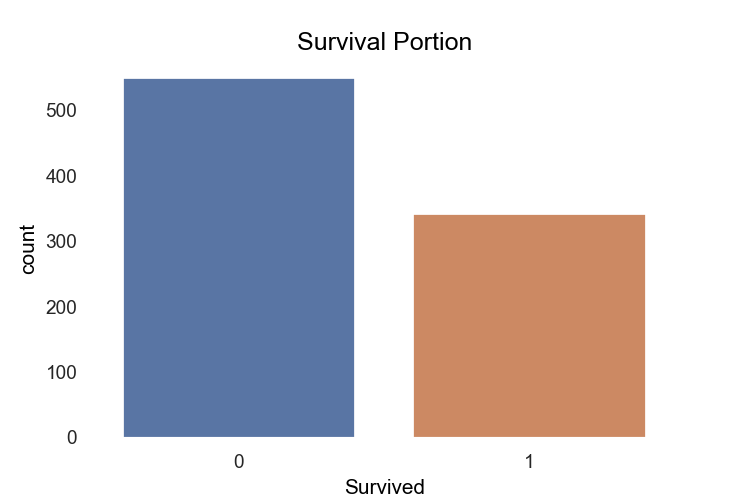

In [134]:
fig = plt.figure(figsize = (6,4))
sns.countplot(x = 'Survived',data = df)
plt.title('Survival Portion');

In [155]:

def uni_1(df,col):
    tot_rec = df.shape[0]
    result = df[col].value_counts()
    Per = df[col].value_counts(normalize=True)
    print('Total number of Records    :',tot_rec)
    print()
    print(result)
    print()
    print('Percentage as follows\n',Per.round(2)*100)
    plt.figure()
    sns.countplot(x = df[col],data = df)
    plt.title('{}'.format(col));

Total number of Records    : 891

0    549
1    342
Name: Survived, dtype: int64

Percentage as follows
 0    62.0
1    38.0
Name: Survived, dtype: float64


<IPython.core.display.Javascript object>


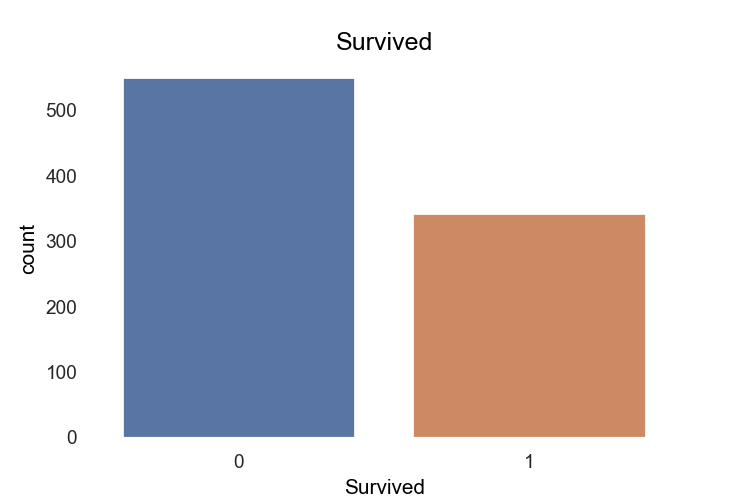

In [156]:
uni_1(df,'Survived')

The name of columns: Survived

Total number of Records    : 891

0    549
1    342
Name: Survived, dtype: int64

Percentage as follows
 0    62.0
1    38.0
Name: Survived, dtype: float64


<IPython.core.display.Javascript object>


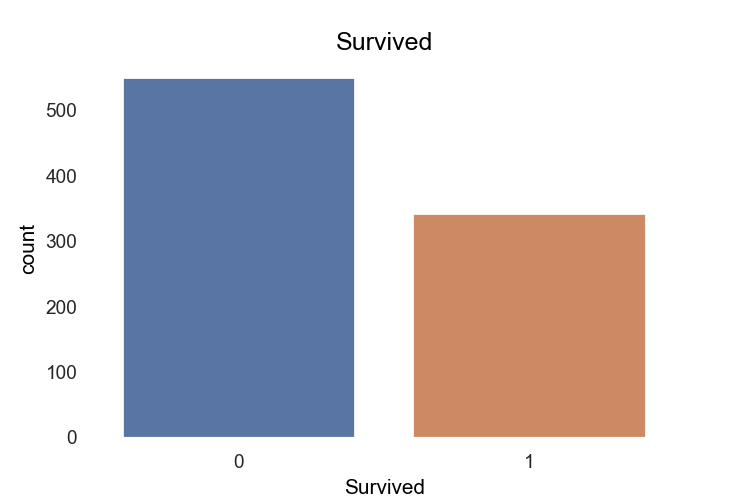

******************************************************************************************
The name of columns: Pclass

Total number of Records    : 891

3    491
1    216
2    184
Name: Pclass, dtype: int64

Percentage as follows
 3    55.0
1    24.0
2    21.0
Name: Pclass, dtype: float64


<IPython.core.display.Javascript object>


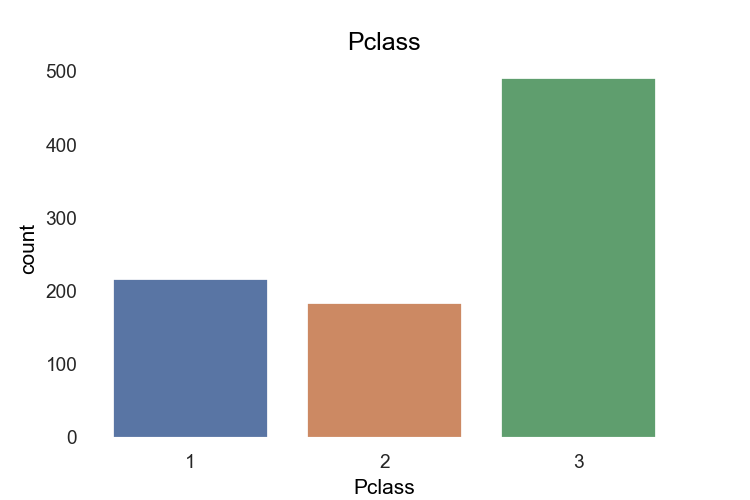

******************************************************************************************
The name of columns: Sex

Total number of Records    : 891

male      577
female    314
Name: Sex, dtype: int64

Percentage as follows
 male      65.0
female    35.0
Name: Sex, dtype: float64


<IPython.core.display.Javascript object>


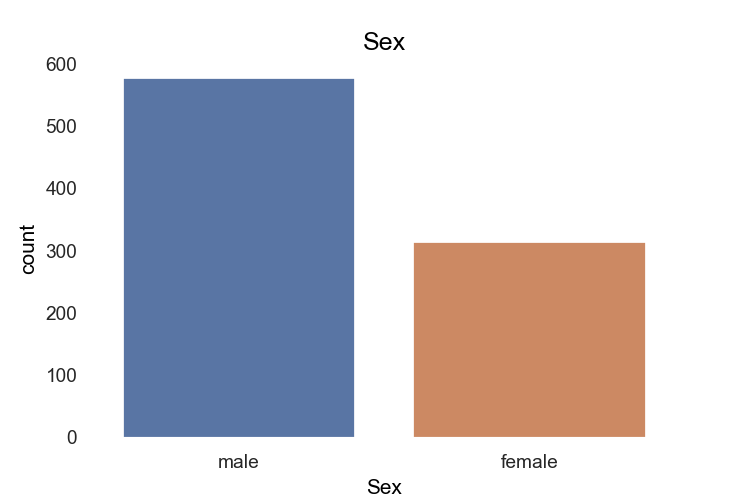

******************************************************************************************
The name of columns: Embarked

Total number of Records    : 891

S                    644
C                    168
Q                     77
29.69911764705882      2
Name: Embarked, dtype: int64

Percentage as follows
 S                    72.0
C                    19.0
Q                     9.0
29.69911764705882     0.0
Name: Embarked, dtype: float64


<IPython.core.display.Javascript object>


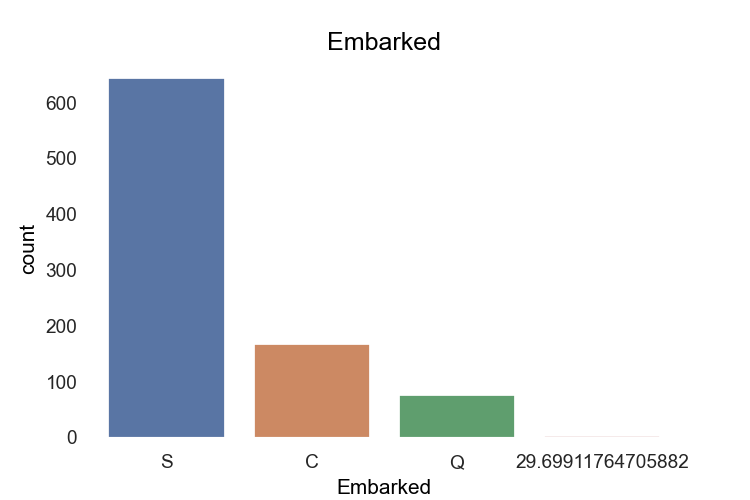

******************************************************************************************


In [161]:
for i in cat_col.columns:
    print('The name of columns:',i)
    print()
    uni_1(df,i)
    print('*'*90)
    

In [163]:
def uni_2(df,col):
    tot_rec = df.shape[0]
    result = df[col].value_counts()
    Per = df[col].value_counts(normalize=True)
    print('Total number of Records    :',tot_rec)
    print()
    print(result)
    print()
    print('Percentage as follows\n',Per.round(2)*100)
    plt.figure()
    sns.countplot(x = df[col],hue = 'Survived',data = df)
    plt.title('{}'.format(col));

The name of columns: Survived

Total number of Records    : 891

0    549
1    342
Name: Survived, dtype: int64

Percentage as follows
 0    62.0
1    38.0
Name: Survived, dtype: float64


<IPython.core.display.Javascript object>


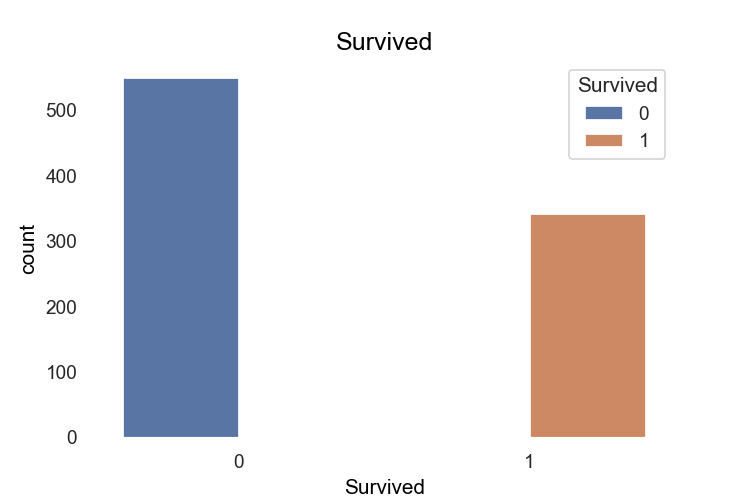

******************************************************************************************
The name of columns: Pclass

Total number of Records    : 891

3    491
1    216
2    184
Name: Pclass, dtype: int64

Percentage as follows
 3    55.0
1    24.0
2    21.0
Name: Pclass, dtype: float64


<IPython.core.display.Javascript object>


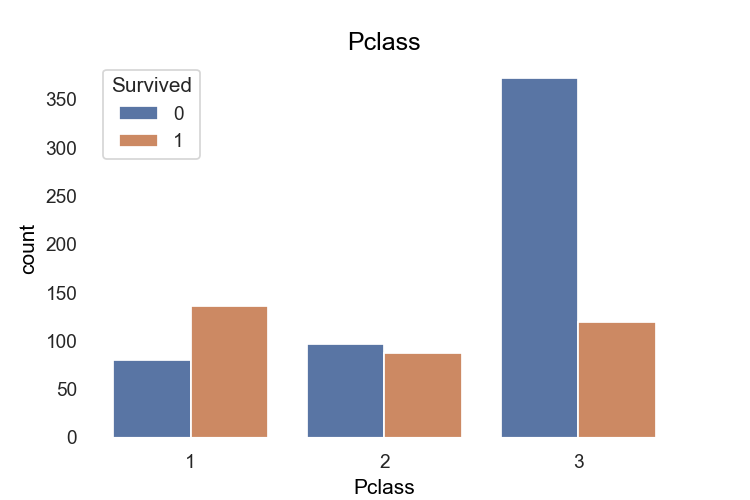

******************************************************************************************
The name of columns: Sex

Total number of Records    : 891

male      577
female    314
Name: Sex, dtype: int64

Percentage as follows
 male      65.0
female    35.0
Name: Sex, dtype: float64


<IPython.core.display.Javascript object>


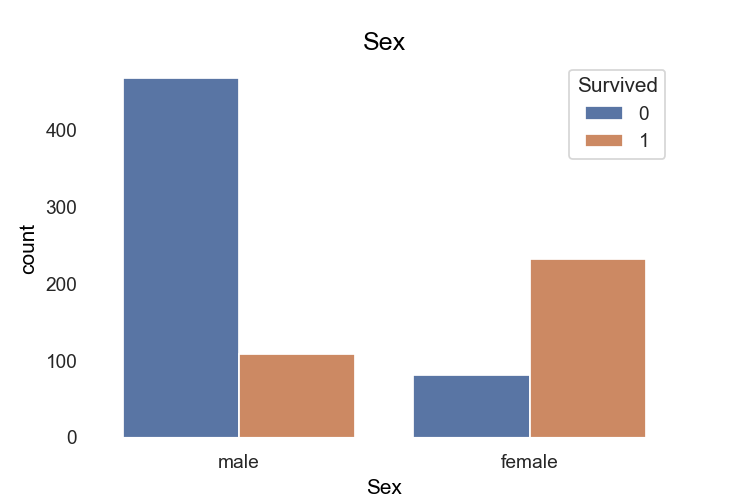

******************************************************************************************
The name of columns: Embarked

Total number of Records    : 891

S                    644
C                    168
Q                     77
29.69911764705882      2
Name: Embarked, dtype: int64

Percentage as follows
 S                    72.0
C                    19.0
Q                     9.0
29.69911764705882     0.0
Name: Embarked, dtype: float64


<IPython.core.display.Javascript object>


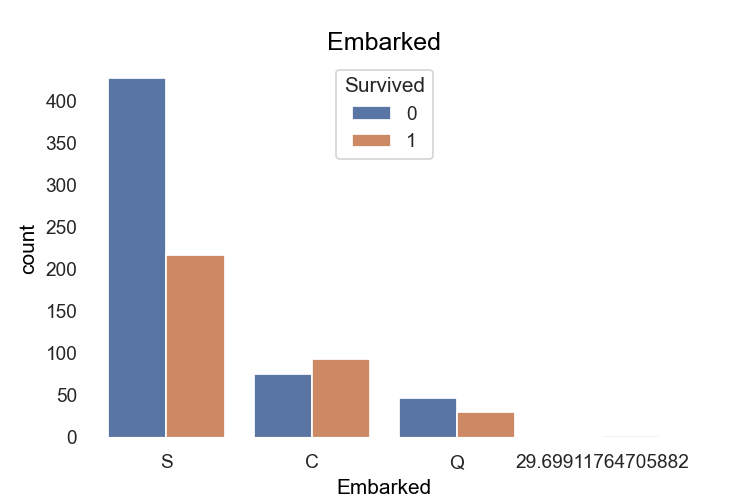

******************************************************************************************


In [164]:
for i in cat_col.columns:
    print('The name of columns:',i)
    print()
    uni_2(df,i)
    print('*'*90)

<IPython.core.display.Javascript object>


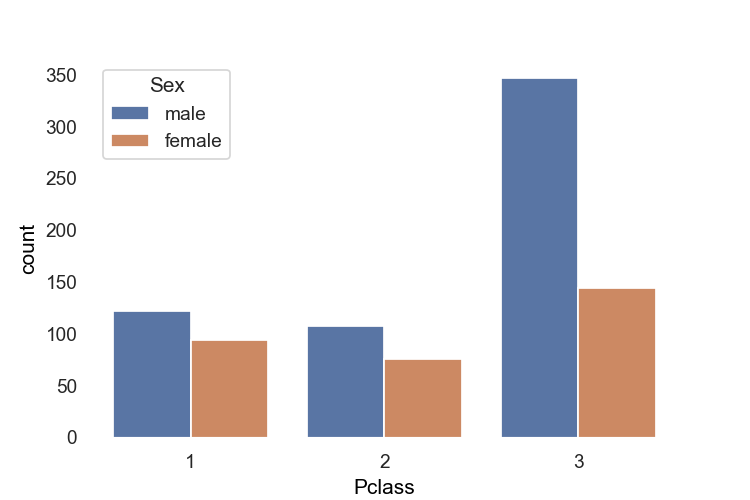

<AxesSubplot:xlabel='Pclass', ylabel='count'>

In [168]:
plt.figure()
sns.countplot(x = 'Pclass',hue = 'Sex',data = df)

In [185]:
men = df[df['Sex'] == 'male']
men

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
...,...,...,...,...,...,...,...,...
883,0,2,male,28.000000,0,0,10.5000,S
884,0,3,male,25.000000,0,0,7.0500,S
886,0,2,male,27.000000,0,0,13.0000,S
889,1,1,male,26.000000,0,0,30.0000,C


In [194]:
(men.groupby(['Pclass'])['Sex'].count() / men.shape[0] * 100).round(2)

Pclass
1    21.14
2    18.72
3    60.14
Name: Sex, dtype: float64

In [198]:
(men.groupby(['Pclass'])['Sex'].count() / men.shape[0] * 100).round(2)

Pclass
1    21.14
2    18.72
3    60.14
Name: Sex, dtype: float64

<IPython.core.display.Javascript object>


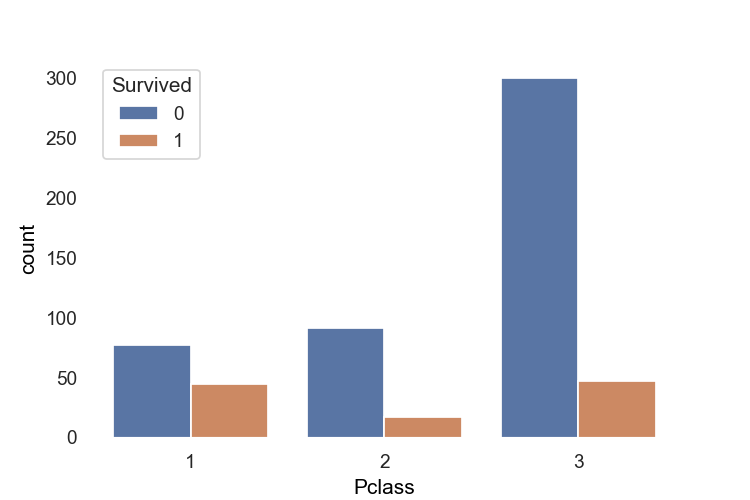

<AxesSubplot:xlabel='Pclass', ylabel='count'>

In [200]:
plt.figure()
sns.countplot(x = 'Pclass',hue = 'Survived',data = men)

In [261]:
num_col

,Age,SibSp,Parch,Fare
0,22.000000,1,0,7.2500
1,38.000000,1,0,71.2833
2,26.000000,0,0,7.9250
3,35.000000,1,0,53.1000
4,35.000000,0,0,8.0500
...,...,...,...,...
886,27.000000,0,0,13.0000
887,19.000000,0,0,30.0000
888,29.699118,1,2,23.4500
889,26.000000,0,0,30.0000


In [279]:
def num_1(df,col):
    stats = df[col].describe().round(2)
    print(stats)
    print()
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (9,4))
    sns.histplot(x = col, data = df,ax = axes[0])
    sns.boxplot(y = col, data = df,ax = axes[1])
    sns.violinplot(y = col, data = df,ax = axes[2])
    
   
   

count    891.00
mean      29.70
std       13.00
min        0.42
25%       22.00
50%       29.70
75%       35.00
max       80.00
Name: Age, dtype: float64



<IPython.core.display.Javascript object>


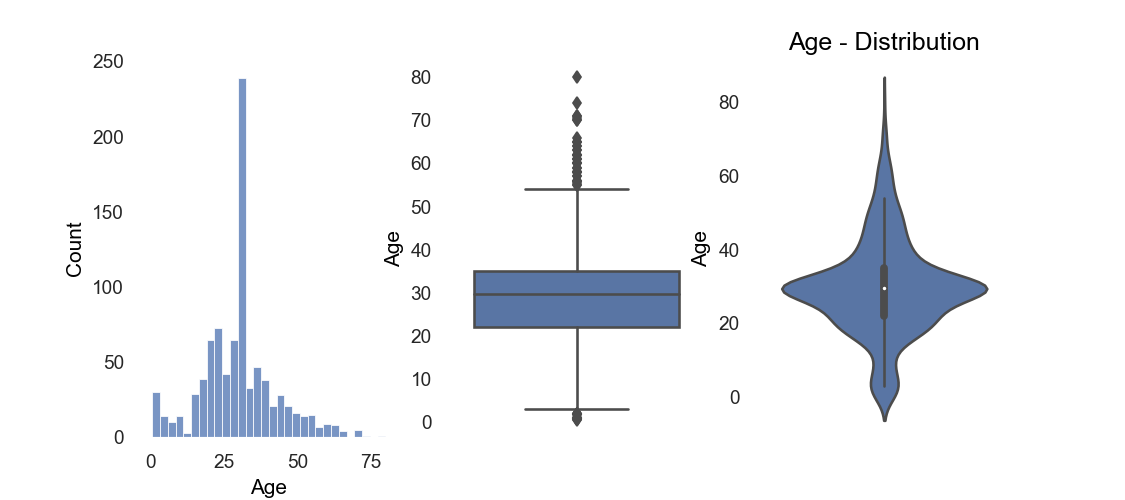

In [280]:
num_1(df,'Age')

The name of columns: Age

count    891.00
mean      29.70
std       13.00
min        0.42
25%       22.00
50%       29.70
75%       35.00
max       80.00
Name: Age, dtype: float64



<IPython.core.display.Javascript object>


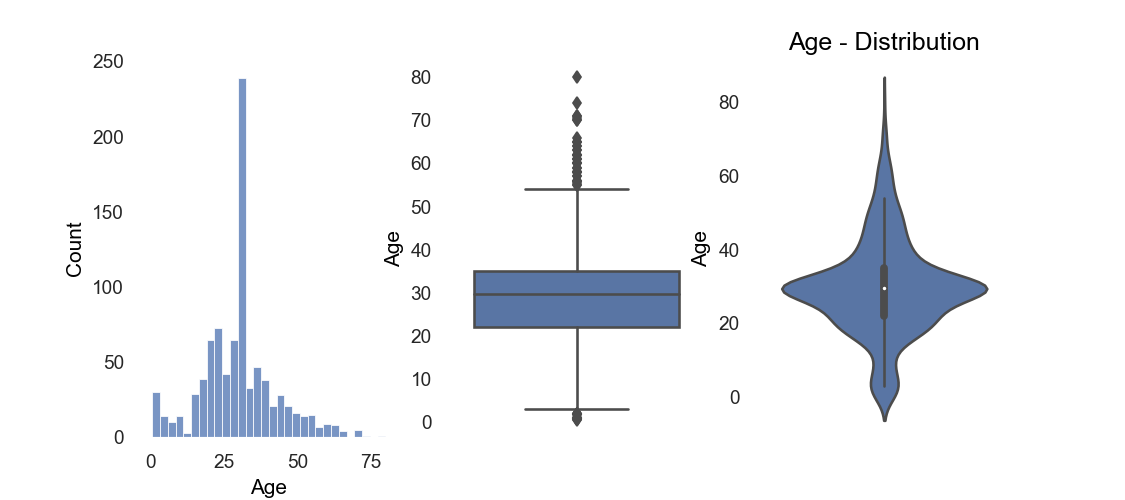

******************************************************************************************
The name of columns: SibSp

count    891.00
mean       0.52
std        1.10
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        8.00
Name: SibSp, dtype: float64



<IPython.core.display.Javascript object>


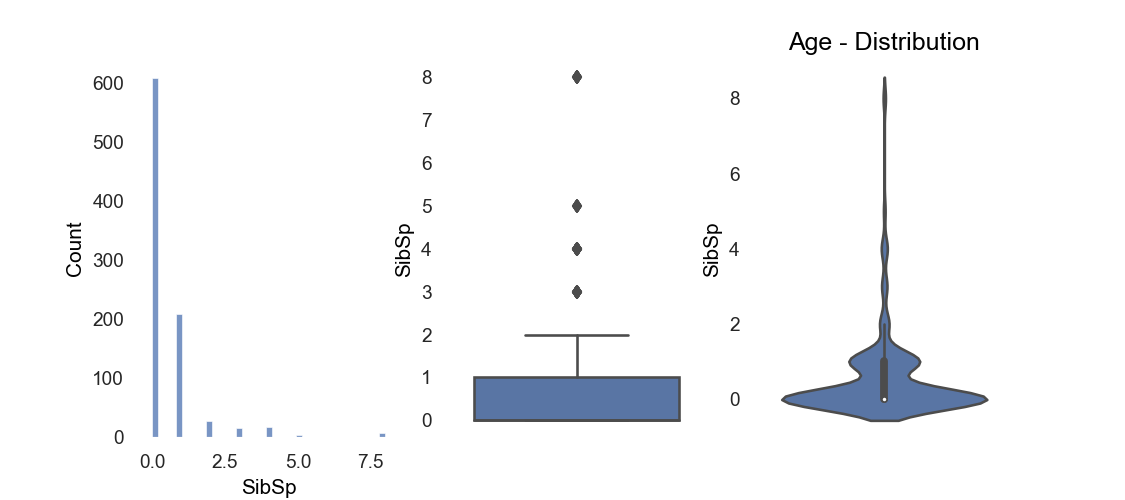

******************************************************************************************
The name of columns: Parch

count    891.00
mean       0.38
std        0.81
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        6.00
Name: Parch, dtype: float64



<IPython.core.display.Javascript object>


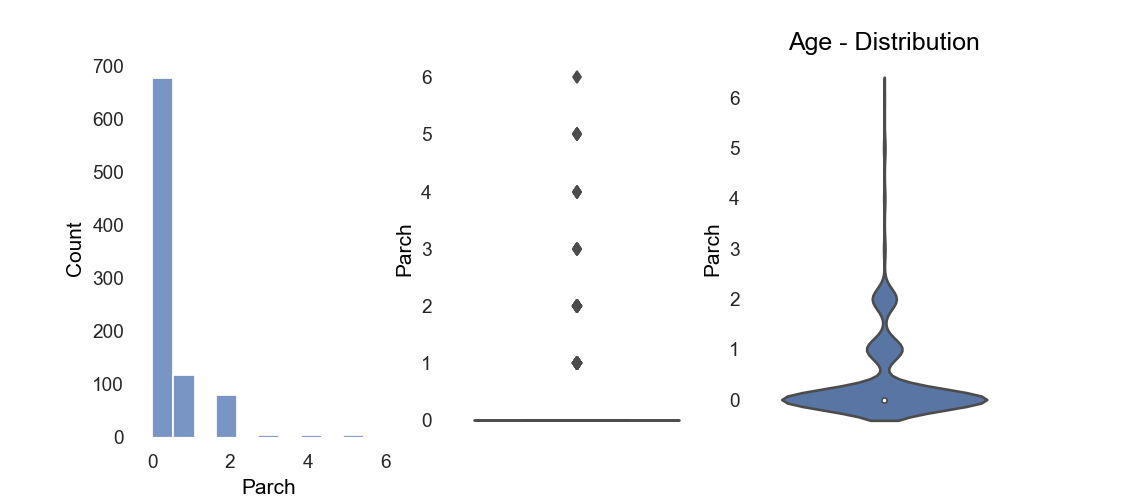

******************************************************************************************
The name of columns: Fare

count    891.00
mean      32.20
std       49.69
min        0.00
25%        7.91
50%       14.45
75%       31.00
max      512.33
Name: Fare, dtype: float64



<IPython.core.display.Javascript object>


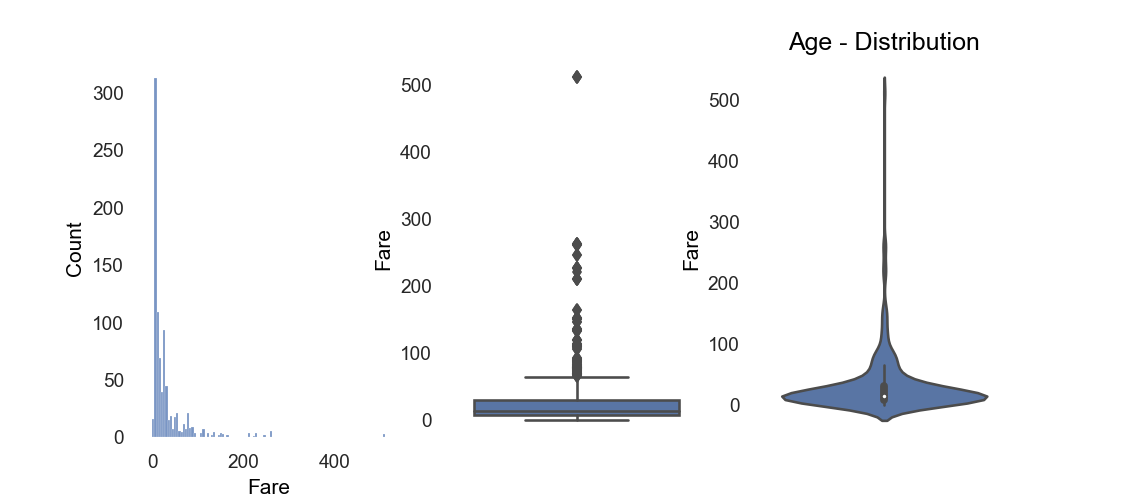

******************************************************************************************


In [282]:
for i in num_col.columns:
    print('The name of columns:',i)
    print()
    num_1(df,i)
    print('*'*90)

<IPython.core.display.Javascript object>


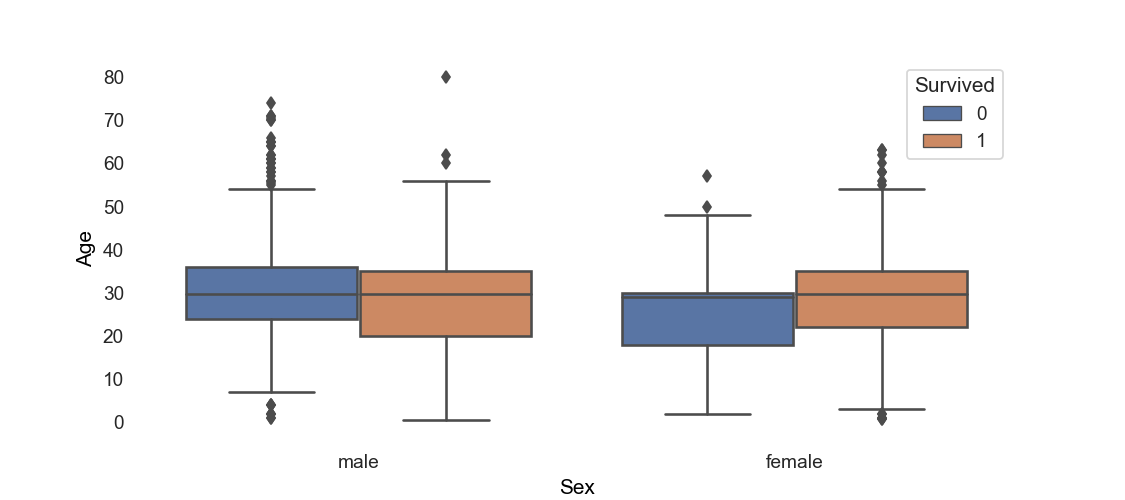

In [287]:
plt.figure(figsize = (9,4))
sns.boxplot(x = 'Sex', y = 'Age',hue = 'Survived', data =df);

<IPython.core.display.Javascript object>


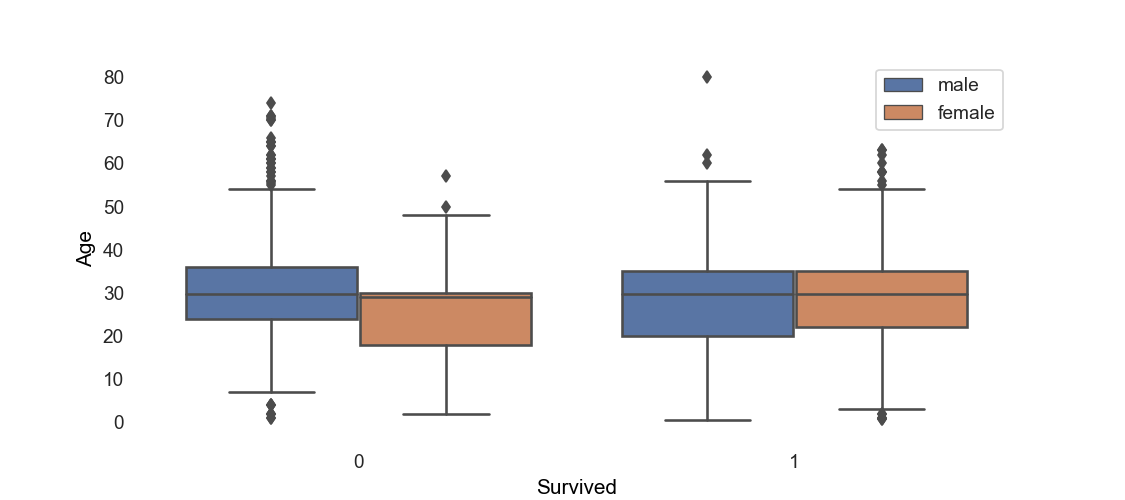

In [289]:
plt.figure(figsize = (9,4))
sns.boxplot(x = 'Survived', y = 'Age',hue = 'Sex', data =df)
plt.legend(loc= 'upper right');

<IPython.core.display.Javascript object>


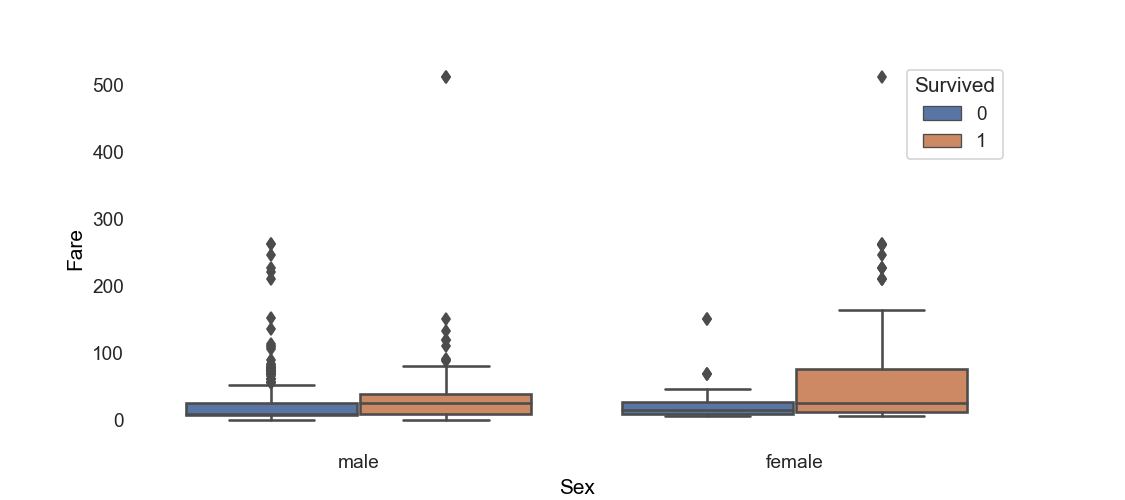

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

In [292]:
plt.figure(figsize = (9,4))
sns.boxplot(x = 'Sex', y = 'Fare', hue = 'Survived',data =df)

<IPython.core.display.Javascript object>


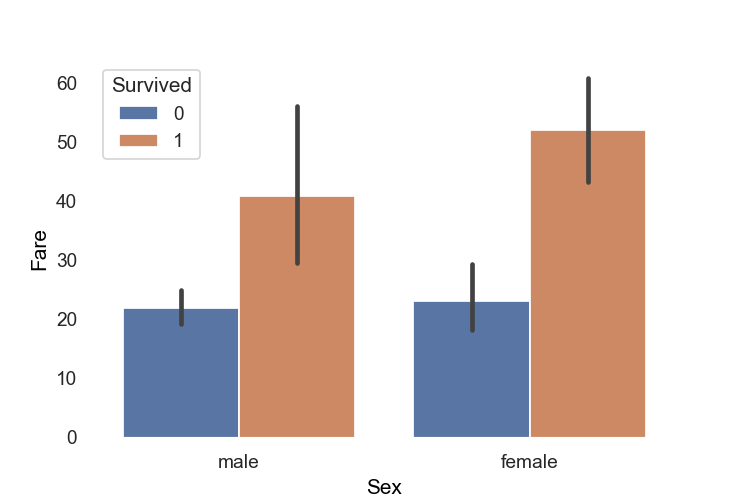

In [295]:
plt.figure()
sns.barplot(x = 'Sex',y = 'Fare',hue = 'Survived' ,data = df);

<IPython.core.display.Javascript object>


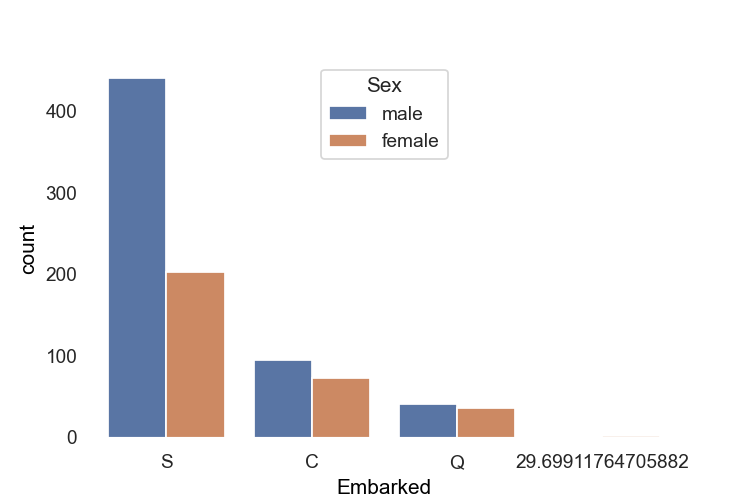

<AxesSubplot:xlabel='Embarked', ylabel='count'>

In [297]:
plt.figure()
sns.countplot(x = 'Embarked', hue = 'Sex',data = df)

<IPython.core.display.Javascript object>


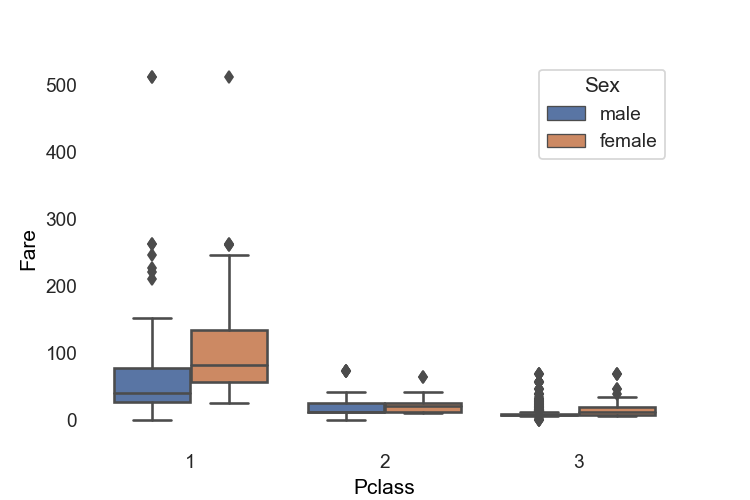

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

In [299]:
plt.figure()
sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Sex', data = df)

<IPython.core.display.Javascript object>


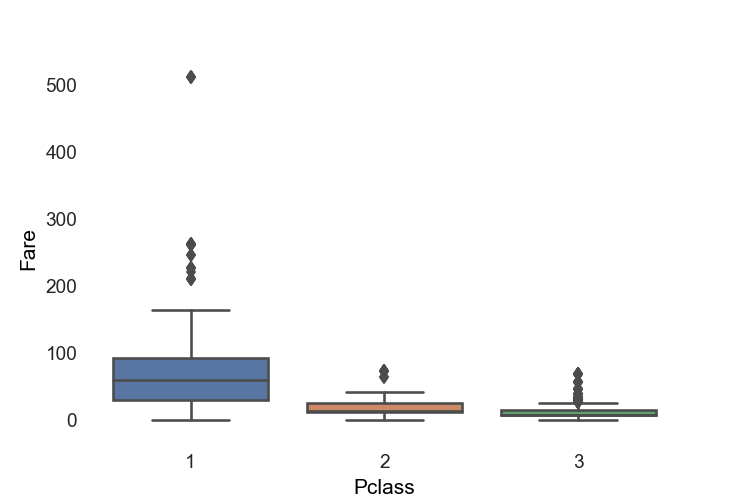

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

In [298]:
plt.figure()
sns.boxplot(x = 'Pclass', y = 'Fare', data = df)

<IPython.core.display.Javascript object>


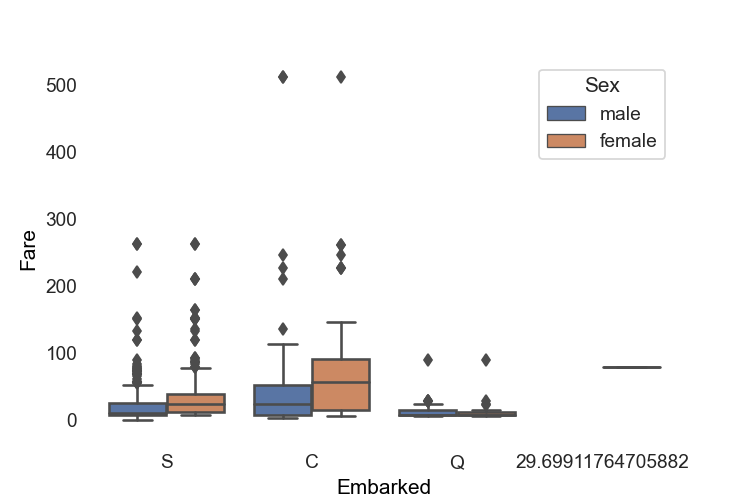

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

In [300]:
plt.figure()
sns.boxplot(x = 'Embarked', y = 'Fare', hue = 'Sex', data = df)

# Conclusion of Descriptive Statistics

* From total passenger only 38% Survived and rest 62% does not
* Many Paseenger around 55% was travelling from 3rd CLass
* out of total passenger,Male passenger are most , accounted for 65% and female 35%
* Mjaority of passenger were board from Location S (72%) compare to C (19%) and Q (9%)

******************************************************************************************************

-- Passenger travelling from 3 rd class are died more 

-- More men are died compeare to female

-- Passenger travel S location are died more

-- first class Passenger specially women surive most

-- Location C boarding passenger survived 

-- Female passenger are paid more  compare to men
******************************************************************************************************
** Passenger travelling from 3 rd class are died more - as they pay less fare compare to other clasess

** More men are died compeare to female - Female travel by 1st class is more and paid high fare

** Female board the ship from location C